In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras.layers import Dense,Flatten, SimpleRNN, Dropout,Bidirectional, Activation
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.
/home/dorsa/anaconda3/envs/lstm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dorsa/anaconda3/envs/lstm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dorsa/anaconda3/envs/lstm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dorsa/anaconda3/envs/ls

            max_temp
date                
1981-01-01      38.1
1981-01-02      32.4
1981-01-03      34.5
1981-01-04      20.7
1981-01-05      21.5


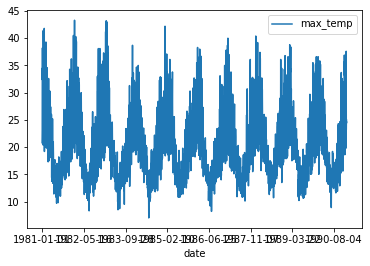

In [2]:
df = pd.read_csv('data/daily-maximum-temperatures-in-me.csv', index_col='date')
print(df.head())
df.plot()

# Data Cleaning

In [3]:
columns_to_keep = ['max_temp']
df = df[columns_to_keep]
df.index.names = ['date']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 3650


,max_temp
date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


In [4]:
df.isnull().sum()

max_temp    0
dtype: int64

In [7]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf4976898>]],
      dtype=object)

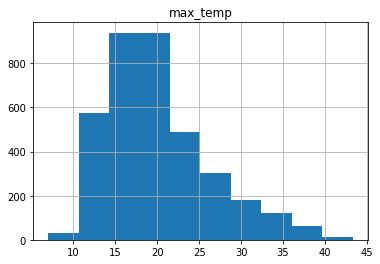

In [9]:
df.hist(bins=10)

# Data Scaling

In [11]:
print('Min', np.min(df))
print('Max', np.max(df))

Min max_temp    7.0
dtype: float64
Max max_temp    43.3
dtype: float64


In [12]:
dataset = df.astype('float32')

In [13]:
# Scaling data into range (0,1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset) 

In [14]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [15]:
print(scaled[:10])

[[0.8567493 ]
 [0.6997246 ]
 [0.7575758 ]
 [0.37741053]
 [0.39944905]
 [0.4435262 ]
 [0.6253444 ]
 [0.81542695]
 [0.8016529 ]
 [0.37465566]]


# Train & Test Data Generating

In [16]:
# Split data into train & test (70/30)

train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


In [17]:
# A function to generating training dataset
# Reshape data into X=t and Y=t+1

def training_data(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
look_back = 1
X_train, y_train = training_data(train, look_back)
X_test, y_test = training_data(test, look_back)

2555 1
0
X 0 to 1
[0.8567493]
Y 1
0.6997246
1
X 1 to 2
[0.6997246]
Y 2
0.7575758
2
X 2 to 3
[0.7575758]
Y 3
0.37741053
3
X 3 to 4
[0.37741053]
Y 4
0.39944905
4
X 4 to 5
[0.39944905]
Y 5
0.4435262
5
X 5 to 6
[0.4435262]
Y 6
0.6253444
6
X 6 to 7
[0.6253444]
Y 7
0.81542695
7
X 7 to 8
[0.81542695]
Y 8
0.8016529
8
X 8 to 9
[0.8016529]
Y 9
0.37465566
9
X 9 to 10
[0.37465566]
Y 10
0.369146
10
X 10 to 11
[0.369146]
Y 11
0.6363637
11
X 11 to 12
[0.6363637]
Y 12
0.87327826
12
X 12 to 13
[0.87327826]
Y 13
0.94765854
13
X 13 to 14
[0.94765854]
Y 14
0.8264463
14
X 14 to 15
[0.8264463]
Y 15
0.7988981
15
X 15 to 16
[0.7988981]
Y 16
0.8264463
16
X 16 to 17
[0.8264463]
Y 17
0.8539945
17
X 17 to 18
[0.8539945]
Y 18
0.44077134
18
X 18 to 19
[0.44077134]
Y 19
0.54269975
19
X 19 to 20
[0.54269975]
Y 20
0.56473833
20
X 20 to 21
[0.56473833]
Y 21
0.40495872
21
X 21 to 22
[0.40495872]
Y 22
0.43801653
22
X 22 to 23
[0.43801653]
Y 23
0.52892566
23
X 23 to 24
[0.52892566]
Y 24
0.81267226
24
X 24 to 25
[0.8126722

[0.5068871]
Y 733
0.57851243
733
X 733 to 734
[0.57851243]
Y 734
0.33608818
734
X 734 to 735
[0.33608818]
Y 735
0.39944905
735
X 735 to 736
[0.39944905]
Y 736
0.60055095
736
X 736 to 737
[0.60055095]
Y 737
0.8347107
737
X 737 to 738
[0.8347107]
Y 738
0.4848485
738
X 738 to 739
[0.4848485]
Y 739
0.39393938
739
X 739 to 740
[0.39393938]
Y 740
0.30027547
740
X 740 to 741
[0.30027547]
Y 741
0.28925622
741
X 741 to 742
[0.28925622]
Y 742
0.32231408
742
X 742 to 743
[0.32231408]
Y 743
0.30578515
743
X 743 to 744
[0.30578515]
Y 744
0.34986228
744
X 744 to 745
[0.34986228]
Y 745
0.415978
745
X 745 to 746
[0.415978]
Y 746
0.34710747
746
X 746 to 747
[0.34710747]
Y 747
0.3030303
747
X 747 to 748
[0.3030303]
Y 748
0.3553719
748
X 748 to 749
[0.3553719]
Y 749
0.5922865
749
X 749 to 750
[0.5922865]
Y 750
0.44077134
750
X 750 to 751
[0.44077134]
Y 751
0.8264463
751
X 751 to 752
[0.8264463]
Y 752
0.3305785
752
X 752 to 753
[0.3305785]
Y 753
0.3415978
753
X 753 to 754
[0.3415978]
Y 754
0.7713499
754
X

[0.47382927]
Y 1443
0.35812676
1443
X 1443 to 1444
[0.35812676]
Y 1444
0.4600551
1444
X 1444 to 1445
[0.4600551]
Y 1445
0.55096424
1445
X 1445 to 1446
[0.55096424]
Y 1446
0.4848485
1446
X 1446 to 1447
[0.4848485]
Y 1447
0.4958678
1447
X 1447 to 1448
[0.4958678]
Y 1448
0.35812676
1448
X 1448 to 1449
[0.35812676]
Y 1449
0.43250692
1449
X 1449 to 1450
[0.43250692]
Y 1450
0.4297521
1450
X 1450 to 1451
[0.4297521]
Y 1451
0.6115703
1451
X 1451 to 1452
[0.6115703]
Y 1452
0.57300276
1452
X 1452 to 1453
[0.57300276]
Y 1453
0.5371901
1453
X 1453 to 1454
[0.5371901]
Y 1454
0.3278237
1454
X 1454 to 1455
[0.3278237]
Y 1455
0.44628102
1455
X 1455 to 1456
[0.44628102]
Y 1456
0.47382927
1456
X 1456 to 1457
[0.47382927]
Y 1457
0.58126724
1457
X 1457 to 1458
[0.58126724]
Y 1458
0.6418733
1458
X 1458 to 1459
[0.6418733]
Y 1459
0.51239675
1459
X 1459 to 1460
[0.51239675]
Y 1460
0.37741053
1460
X 1460 to 1461
[0.37741053]
Y 1461
0.34710747
1461
X 1461 to 1462
[0.34710747]
Y 1462
0.40495872
1462
X 1462 to 1

[0.37741053]
Y 2186
0.40771347
2186
X 2186 to 2187
[0.40771347]
Y 2187
0.41046834
2187
X 2187 to 2188
[0.41046834]
Y 2188
0.7713499
2188
X 2188 to 2189
[0.7713499]
Y 2189
0.523416
2189
X 2189 to 2190
[0.523416]
Y 2190
0.35812676
2190
X 2190 to 2191
[0.35812676]
Y 2191
0.73278236
2191
X 2191 to 2192
[0.73278236]
Y 2192
0.36088157
2192
X 2192 to 2193
[0.36088157]
Y 2193
0.4545455
2193
X 2193 to 2194
[0.4545455]
Y 2194
0.4573003
2194
X 2194 to 2195
[0.4573003]
Y 2195
0.4820937
2195
X 2195 to 2196
[0.4820937]
Y 2196
0.55096424
2196
X 2196 to 2197
[0.55096424]
Y 2197
0.27548212
2197
X 2197 to 2198
[0.27548212]
Y 2198
0.3278237
2198
X 2198 to 2199
[0.3278237]
Y 2199
0.40771347
2199
X 2199 to 2200
[0.40771347]
Y 2200
0.56473833
2200
X 2200 to 2201
[0.56473833]
Y 2201
0.43526173
2201
X 2201 to 2202
[0.43526173]
Y 2202
0.5371901
2202
X 2202 to 2203
[0.5371901]
Y 2203
0.43250692
2203
X 2203 to 2204
[0.43250692]
Y 2204
0.42699724
2204
X 2204 to 2205
[0.42699724]
Y 2205
0.8484849
2205
X 2205 to 22

[0.7988981]
Y 393
0.81542695
393
X 393 to 394
[0.81542695]
Y 394
0.40495872
394
X 394 to 395
[0.40495872]
Y 395
0.35261708
395
X 395 to 396
[0.35261708]
Y 396
0.54269975
396
X 396 to 397
[0.54269975]
Y 397
0.43801653
397
X 397 to 398
[0.43801653]
Y 398
0.35261708
398
X 398 to 399
[0.35261708]
Y 399
0.49311298
399
X 399 to 400
[0.49311298]
Y 400
0.4903581
400
X 400 to 401
[0.4903581]
Y 401
0.60055095
401
X 401 to 402
[0.60055095]
Y 402
0.70798904
402
X 402 to 403
[0.70798904]
Y 403
0.73553723
403
X 403 to 404
[0.73553723]
Y 404
0.48760337
404
X 404 to 405
[0.48760337]
Y 405
0.40220386
405
X 405 to 406
[0.40220386]
Y 406
0.52892566
406
X 406 to 407
[0.52892566]
Y 407
0.7272728
407
X 407 to 408
[0.7272728]
Y 408
0.43801653
408
X 408 to 409
[0.43801653]
Y 409
0.66666675
409
X 409 to 410
[0.66666675]
Y 410
0.4435262
410
X 410 to 411
[0.4435262]
Y 411
0.47933882
411
X 411 to 412
[0.47933882]
Y 412
0.6528926
412
X 412 to 413
[0.6528926]
Y 413
0.87603307
413
X 413 to 414
[0.87603307]
Y 414
0.3

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


# LSTM model

In [ ]:
# Bidirectional LSTM

batch_size = 1

model = Sequential()
model.add(Bidirectional(LSTM(4), batch_input_shape=(batch_size, look_back, 1)))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)


In [ ]:
# LSTM

batch_size = 1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1)))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/10
 - 6s - loss: 0.0235
Epoch 2/10
 - 5s - loss: 0.0138
Epoch 3/10
 - 5s - loss: 0.0133
Epoch 4/10
 - 5s - loss: 0.0131
Epoch 5/10
 - 5s - loss: 0.0131
Epoch 6/10
 - 5s - loss: 0.0130
Epoch 7/10
 - 5s - loss: 0.0130
Epoch 8/10
 - 5s - loss: 0.0129
Epoch 9/10
 - 5s - loss: 0.0129
Epoch 10/10


In [ ]:
# Simple Regression

y_train = np.reshape(y_train, (y_train.shape[0], 1, 1))

batch_size = 1

model = Sequential()
model.add(Dense(4, batch_input_shape=(batch_size, look_back, 1)))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)



In [ ]:
# Calculate RMSE on Test Data

# y_test = np.reshape(y_test, (y_test.shape[0], 1))
#y_train = np.reshape(y_train, (y_train.shape[0]))

print(y_test.shape)
print(y_train.shape)


trainPredict = model.predict(X_train, batch_size=batch_size)
print(trainPredict.shape)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)



trainPredict = np.reshape(trainPredict, (trainPredict.shape[0], 1))
testPredict = np.reshape(testPredict, (testPredict.shape[0], 1))

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
print(y_train.shape)


testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
print(y_test.shape)


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# Plot the results

trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

# plot baseline and predictions

plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()